In [1]:
suppressMessages(library(tidyr))
suppressMessages(library(dplyr))
suppressMessages(library(ggplot2))
suppressMessages(library(gridExtra))
suppressMessages(library(RColorBrewer))
options(repr.plot.width = 8, repr.plot.height = 4)

ERROR: Error in library(gridExtra): there is no package called 'gridExtra'


# <font color=blue>Chapter 1:  Exploring pitch velocities</font>

#### Clean the data

In [79]:
greinke <- read.csv("greinke2015.csv", stringsAsFactors = FALSE)

# Print the first 6 rows of the data
head(greinke, n = 6)

# Print the number of rows in the data frame
nrow(greinke)

# Summarize the start_speed variable
summary(greinke$start_speed)

# Get rid of data without start_speed
greinke <- subset(greinke, !is.na(greinke$start_speed))

# Print the number of complete entries
nrow(greinke)

# Print the structure of greinke
str(greinke)

p_name,pitcher_id,batter_stand,pitch_type,pitch_result,atbat_result,start_speed,z0,x0,pfx_x,...,outs,game_date,inning,inning_topbot,batted_ball_type,batted_ball_velocity,hc_x,hc_y,pitch_id,distance_feet
Zack Greinke,425844,R,FF,Ball,Walk,94.2,5.997,-0.675,-4.457,...,2,10/3/2015,4,top,,NA,0.00,0.00,160,NA
Zack Greinke,425844,R,FF,Swinging Strike,Single,92.4,6.281,-0.760,-1.590,...,0,10/3/2015,3,top,,104,123.56,97.26,95,0
Zack Greinke,425844,R,FF,Called Strike,Home Run,92.7,6.168,-0.958,-1.884,...,1,10/3/2015,5,top,,103,50.88,31.17,218,425
Zack Greinke,425844,R,SL,Swinging Strike,Strikeout,86.9,6.077,-0.939,3.594,...,0,10/3/2015,6,top,,NA,0.00,0.00,265,NA
Zack Greinke,425844,R,FF,Swinging Strike,Strikeout,92.8,6.107,-0.524,-0.558,...,0,10/3/2015,8,top,,NA,0.00,0.00,374,NA
Zack Greinke,425844,R,SL,Swinging Strike,Strikeout,87.8,6.321,-0.948,4.313,...,1,10/3/2015,1,top,,NA,0.00,0.00,14,NA


[1] 3239

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  52.20   87.30   89.80   88.44   91.80   95.40       3 

[1] 3236

'data.frame':	3236 obs. of  29 variables:
 $ p_name              : chr  "Zack Greinke" "Zack Greinke" "Zack Greinke" "Zack Greinke" ...
 $ pitcher_id          : int  425844 425844 425844 425844 425844 425844 425844 425844 425844 425844 ...
 $ batter_stand        : chr  "R" "R" "R" "R" ...
 $ pitch_type          : chr  "FF" "FF" "FF" "SL" ...
 $ pitch_result        : chr  "Ball" "Swinging Strike" "Called Strike" "Swinging Strike" ...
 $ atbat_result        : chr  "Walk" "Single" "Home Run" "Strikeout" ...
 $ start_speed         : num  94.2 92.4 92.7 86.9 92.8 87.8 90.3 92.7 85.5 87.3 ...
 $ z0                  : num  6 6.28 6.17 6.08 6.11 ...
 $ x0                  : num  -0.675 -0.76 -0.958 -0.939 -0.524 ...
 $ pfx_x               : num  -4.457 -1.59 -1.884 3.594 -0.558 ...
 $ pfx_z               : num  9.76 11.4 9.245 0.762 11.134 ...
 $ px                  : num  1.714 0.589 0.399 0.764 1.517 ...
 $ pz                  : num  1.92 3.27 2.92 1.31 2.19 ...
 $ break_angle         : num 

#### Check dates

In [80]:
# Check if dates are formatted as dates
class(greinke$game_date)

# Change them to dates
greinke$game_date <- as.Date(greinke$game_date, format = '%m/%d/%Y')

# Check that the variable is now formatted as a date
class(greinke$game_date)

[1] "character"

[1] "Date"

#### Delimit dates

In [81]:
# Separate game_date into "year", "month", and "day"
greinke <- separate(data = greinke, col = 'game_date',
                    into = c('year', 'month', 'day'),
                    sep = "-", remove = FALSE)

# Convert month to numeric
greinke$month <-as.numeric(greinke$month)

# Create the july variable
greinke$july <-ifelse(greinke$month == 7, "july", "other")

# View the head() of greinke
head(greinke)

# Print a summary of the july variable
summary(factor(greinke$july))

p_name,pitcher_id,batter_stand,pitch_type,pitch_result,atbat_result,start_speed,z0,x0,pfx_x,...,day,inning,inning_topbot,batted_ball_type,batted_ball_velocity,hc_x,hc_y,pitch_id,distance_feet,july
Zack Greinke,425844,R,FF,Ball,Walk,94.2,5.997,-0.675,-4.457,...,03,4,top,,NA,0.00,0.00,160,NA,other
Zack Greinke,425844,R,FF,Swinging Strike,Single,92.4,6.281,-0.760,-1.590,...,03,3,top,,104,123.56,97.26,95,0,other
Zack Greinke,425844,R,FF,Called Strike,Home Run,92.7,6.168,-0.958,-1.884,...,03,5,top,,103,50.88,31.17,218,425,other
Zack Greinke,425844,R,SL,Swinging Strike,Strikeout,86.9,6.077,-0.939,3.594,...,03,6,top,,NA,0.00,0.00,265,NA,other
Zack Greinke,425844,R,FF,Swinging Strike,Strikeout,92.8,6.107,-0.524,-0.558,...,03,8,top,,NA,0.00,0.00,374,NA,other
Zack Greinke,425844,R,SL,Swinging Strike,Strikeout,87.8,6.321,-0.948,4.313,...,03,1,top,,NA,0.00,0.00,14,NA,other


july other 
  524  2712

#### Velocity distribution

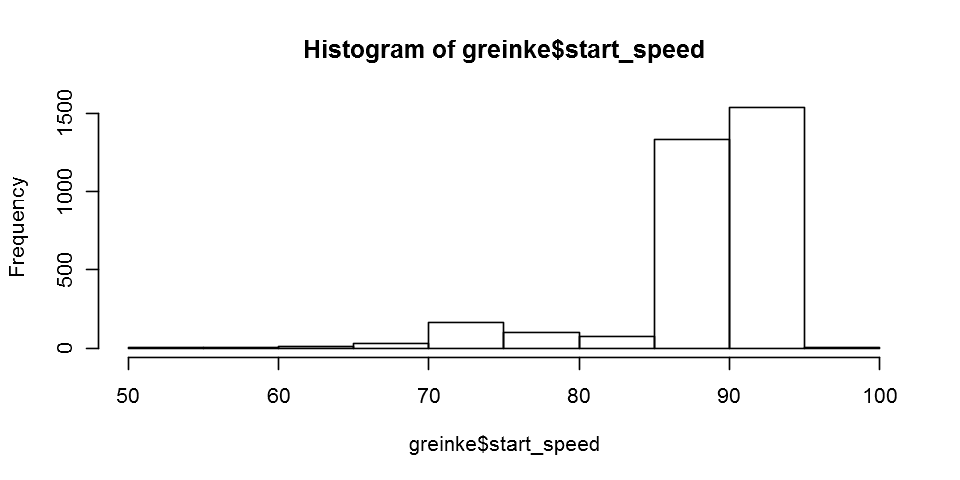

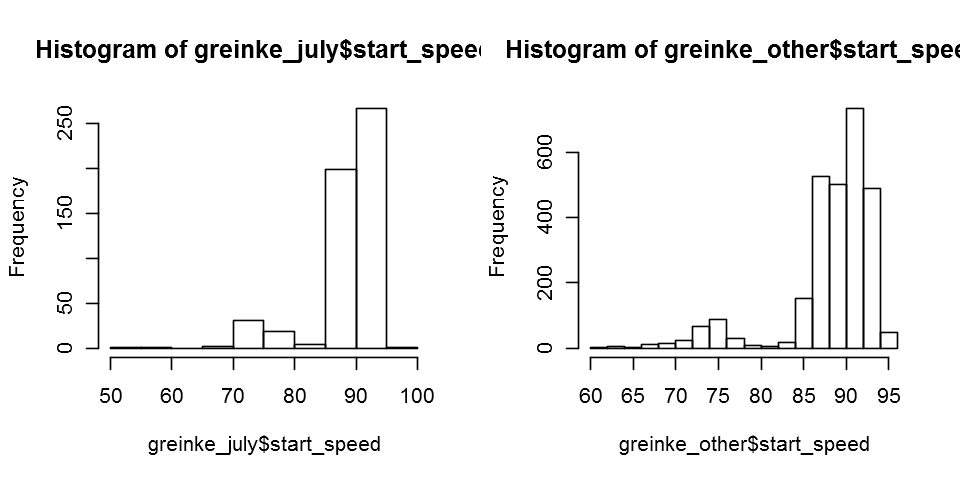

In [82]:
# Make a histogram of Greinke's start speed
hist(greinke$start_speed)

# Create greinke_july
greinke_july <- subset(greinke, greinke$july == "july")

# Create greinke_other
greinke_other <- subset(greinke, greinke$july == "other")

# Use par to format your plot layout
par(mfrow = c(1,2))

# Plot start_speed histogram from july
hist(greinke_july$start_speed)

# Plot start_speed histogram for other months
hist(greinke_other$start_speed)

#### Fastball velocity distribution

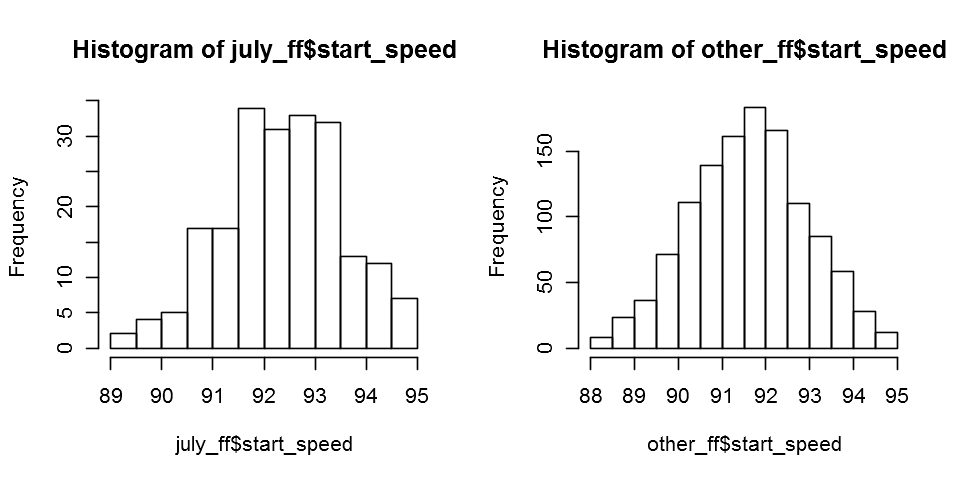

In [83]:
# Create july_ff
july_ff <- subset(greinke_july, greinke_july$pitch_type == "FF")

# Create other_ff
other_ff <- subset(greinke_other, greinke_other$pitch_type == "FF")

# Formatting code, don't change this
par(mfrow = c(1, 2))

# Plot histogram of July fastball speeds
hist(july_ff$start_speed)

# Plot histogram of other month fastball speeds
hist(other_ff$start_speed)

#### Distribution comparisons with color

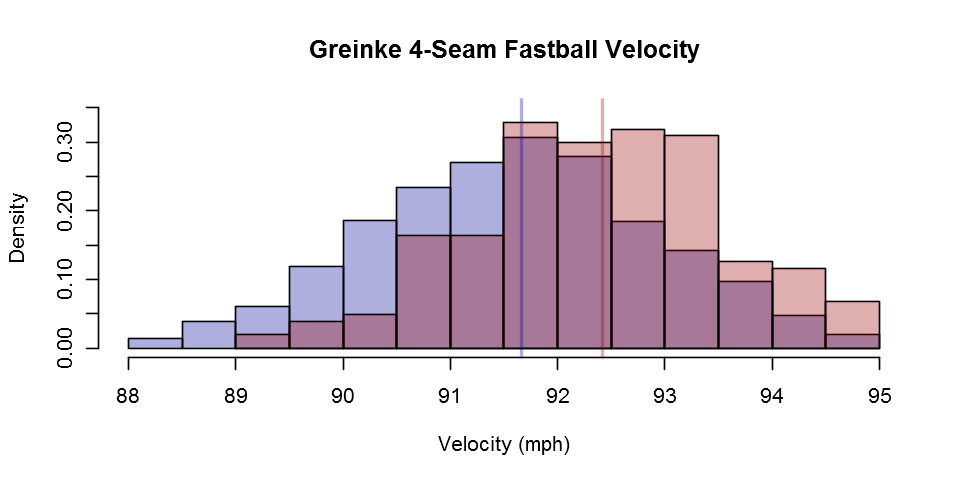

In [84]:
# Make a fastball speed histogram for other months
hist(other_ff$start_speed,
     col = "#00009950", freq = FALSE,
     ylim = c(0, .35), xlab = "Velocity (mph)",
     main = "Greinke 4-Seam Fastball Velocity")

# Add a histogram for July
hist(july_ff$start_speed, add = TRUE,
     col = "#99000050", freq = FALSE)

# Draw vertical line at the mean of other_ff
abline(v = mean(other_ff$start_speed), lwd = 2, col = "#00009950")

# Draw vertical line at the mean of july_ff
abline(v = mean(july_ff$start_speed), lwd = 2, col = "#99000050")


#### tapply() for velocity changes

In [85]:
# Summarize velocity in July and other months
tapply(greinke$start_speed, greinke$july, mean)

# Create greinke_ff
greinke_ff <- subset(greinke, greinke$pitch_type == "FF")

# Calculate mean fastball velocities: ff_velo_month
ff_velo_month <- tapply(greinke_ff$start_speed, greinke_ff$july, mean)

# Print ff_velo_month
ff_velo_month

july    other 
88.86489 88.35601

july    other 
92.42077 91.66474

#### Game-by-game velocity changes

In [86]:
# Create ff_dt
ff_dt <- data.frame(tapply(greinke_ff$start_speed, greinke_ff$game_date, mean))

# Print the first 6 rows of ff_dt
head(ff_dt)

,tapply.greinke_ff.start_speed..greinke_ff.game_date..mean.
2015-04-07,90.82632
2015-04-12,90.51622
2015-04-18,90.28654
2015-04-24,90.51277
2015-04-29,90.40732
2015-05-05,90.33043


#### Tidying the data frame

In [87]:
# Create game_date in ff_dt
ff_dt$game_date <- as.Date(row.names(ff_dt), format = "%Y-%m-%d")

# Rename the first column
colnames(ff_dt)[1] <- "start_speed"

# Remove row names
row.names(ff_dt) <- NULL

# View head of ff_dt
head(ff_dt)

start_speed,game_date
90.82632,2015-04-07
90.51622,2015-04-12
90.28654,2015-04-18
90.51277,2015-04-24
90.40732,2015-04-29
90.33043,2015-05-05


#### A game-by-game line plot

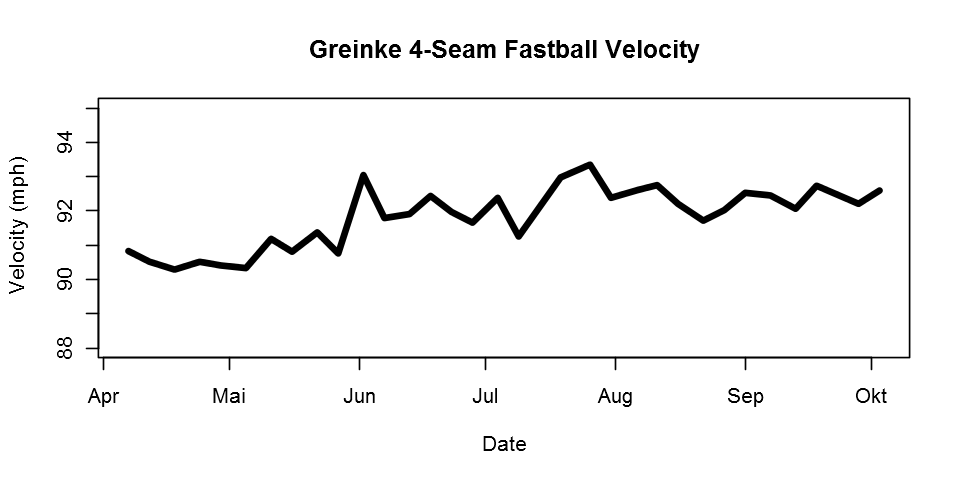

In [88]:
# Plot game-by-game 4-seam fastballs
plot(ff_dt$start_speed ~ ff_dt$game_date,
     lwd = 4, type = "l", ylim = c(88, 95),
     main = "Greinke 4-Seam Fastball Velocity",
     xlab = "Date", ylab = "Velocity (mph)")

#### Adding jittered points

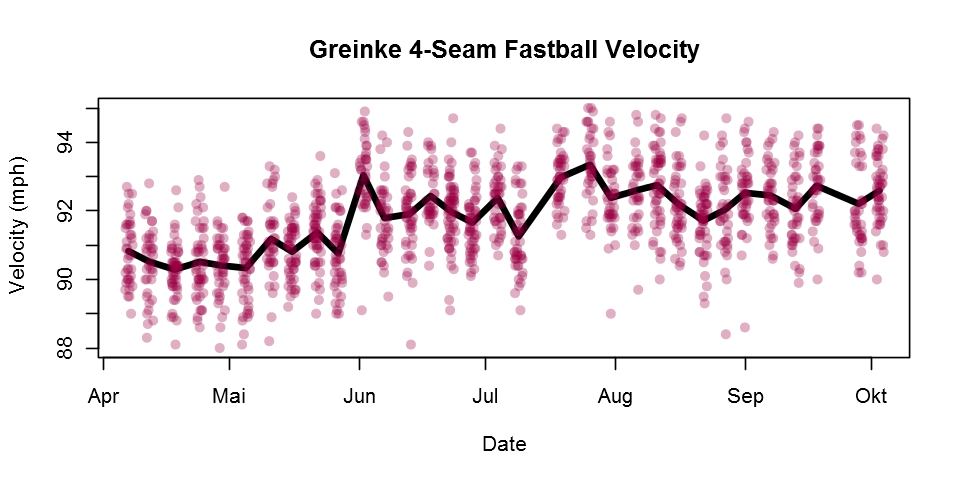

In [89]:
# Code from last exercise, don't change this
plot(ff_dt$start_speed ~ ff_dt$game_date,
     lwd = 4, type = "l", ylim = c(88, 95),
     main = "Greinke 4-Seam Fastball Velocity",
     xlab = "Date", ylab = "Velocity (mph)")

# Add jittered points to the plot
points(greinke_ff$start_speed ~ jitter(as.numeric(greinke_ff$game_date)), pch = 16, col = "#99004450")

# <font color=blue>Chapter 2:  Exploring pitch types </font>

#### Pitch mix tables

In [90]:
greinke$pitch_type <- as.factor(greinke$pitch_type)

# Subset the data to remove pitch types "IN" and "EP"
greinke <- subset(greinke, greinke$pitch_type != "IN" & greinke$pitch_type != "EP")

# Drop the levels from pitch_type
greinke$pitch_type <- droplevels(greinke$pitch_type)

# Create type_tab
type_tab <- table(greinke$pitch_type, greinke$july)

# Print type_tab
type_tab

    
     july other
  CH  112   487
  CU   51   242
  FF  207  1191
  FT   66   255
  SL   86   535

#### Pitch mix table using prop.table()

In [91]:
# Create type_prop table (margin = 2 computes proportions within each column)
type_prop <- round(prop.table(type_tab, margin = 2), digit = 3)

# Print type_prop
type_prop

    
      july other
  CH 0.215 0.180
  CU 0.098 0.089
  FF 0.397 0.439
  FT 0.126 0.094
  SL 0.165 0.197

#### Pitch mix tables - July vs. other

In [92]:
# Create ff_prop
ff_prop <- type_prop[3,]

# Print ff_prop
ff_prop

# Print ff_velo_month (wurde oben berechnet)
ff_velo_month

july other 
0.397 0.439

july    other 
92.42077 91.66474

#### Pitch mix tables - changes in pitch type rates

In [93]:
# Datenaufbereitung
type_prop <- as.data.frame.matrix(type_prop)
names(type_prop) <- c("July", "Other")
type_prop$Pitch <- row.names(type_prop)
type_prop

,July,Other,Pitch
CH,0.215,0.180,CH
CU,0.098,0.089,CU
FF,0.397,0.439,FF
FT,0.126,0.094,FT
SL,0.165,0.197,SL


In [ ]:
# Create the Difference column
type_prop$Difference <- (type_prop$July - type_prop$Other) / type_prop$Other

# Print type_prop
type_prop

# Plot a barplot
barplot(type_prop$Difference, names.arg = type_prop$Pitch, 
        main = "Pitch Usage in July vs. Other Months", 
        ylab = "Percentage Change in July", 
        ylim = c(-0.3, 0.3))

#### Ball-strike count frequency

In [94]:
# Create bs_table
bs_table <- table(greinke$balls, greinke$strikes)

# Create bs_prop_table
bs_prop_table <- round(prop.table(bs_table), digits = 3)

# Print bs_prop_table
bs_prop_table

# Print row sums
rowSums(bs_prop_table)

# Print column sums
colSums(bs_prop_table)

   
        0     1     2
  0 0.261 0.135 0.062
  1 0.095 0.115 0.096
  2 0.026 0.053 0.093
  3 0.006 0.015 0.043

0     1     2     3 
0.458 0.306 0.172 0.064

0     1     2 
0.388 0.318 0.294

#### Make a new variable

In [95]:
# Create bs_count
greinke$bs_count <- paste(greinke$balls, greinke$strikes, sep = "-")

# Print the first 6 rows of greinke
head(greinke)

p_name,pitcher_id,batter_stand,pitch_type,pitch_result,atbat_result,start_speed,z0,x0,pfx_x,...,inning,inning_topbot,batted_ball_type,batted_ball_velocity,hc_x,hc_y,pitch_id,distance_feet,july,bs_count
Zack Greinke,425844,R,FF,Ball,Walk,94.2,5.997,-0.675,-4.457,...,4,top,,NA,0.00,0.00,160,NA,other,2-2
Zack Greinke,425844,R,FF,Swinging Strike,Single,92.4,6.281,-0.760,-1.590,...,3,top,,104,123.56,97.26,95,0,other,1-1
Zack Greinke,425844,R,FF,Called Strike,Home Run,92.7,6.168,-0.958,-1.884,...,5,top,,103,50.88,31.17,218,425,other,0-0
Zack Greinke,425844,R,SL,Swinging Strike,Strikeout,86.9,6.077,-0.939,3.594,...,6,top,,NA,0.00,0.00,265,NA,other,1-2
Zack Greinke,425844,R,FF,Swinging Strike,Strikeout,92.8,6.107,-0.524,-0.558,...,8,top,,NA,0.00,0.00,374,NA,other,1-2
Zack Greinke,425844,R,SL,Swinging Strike,Strikeout,87.8,6.321,-0.948,4.313,...,1,top,,NA,0.00,0.00,14,NA,other,2-2


#### Ball-strike count in July vs. other months

In [96]:
# Create bs_count_tab
bs_count_tab <- table(greinke$bs_count, greinke$july)

# Create bs_month
bs_month <- round(prop.table(bs_count_tab, margin = 2), digits = 3)

# Print bs_month
bs_month

     
       july other
  0-0 0.261 0.262
  0-1 0.134 0.135
  0-2 0.056 0.063
  1-0 0.105 0.093
  1-1 0.123 0.113
  1-2 0.092 0.097
  2-0 0.029 0.025
  2-1 0.052 0.053
  2-2 0.086 0.094
  3-0 0.006 0.006
  3-1 0.015 0.015
  3-2 0.042 0.043

0-0    0-1    0-2    1-0    1-1    1-2    2-0    2-1    2-2    3-0    3-1 
-0.004 -0.007 -0.111  0.129  0.088 -0.052  0.160 -0.019 -0.085  0.000  0.000 
   3-2 
-0.023

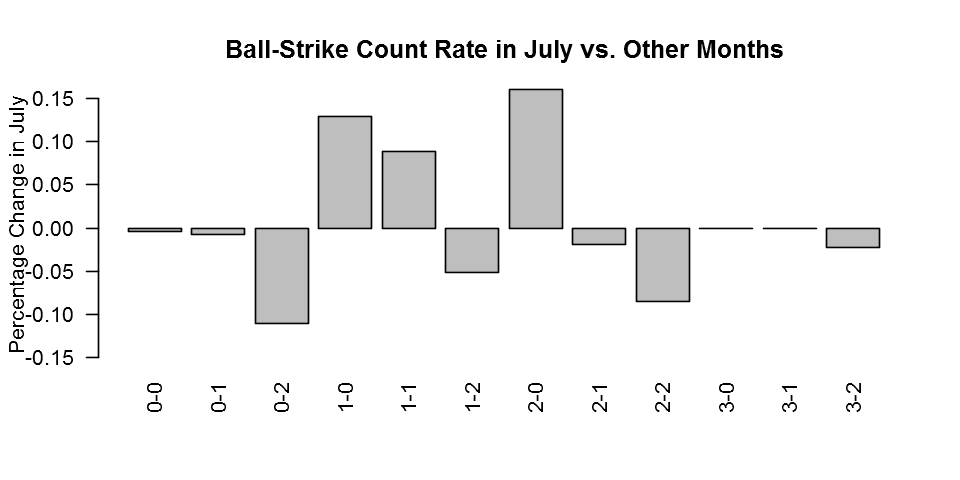

In [97]:
# Create diff_bs
diff_bs <- round((bs_month[, 1] - bs_month[, 2]) / bs_month[, 2], digits = 3)

# Print diff_bs
diff_bs

# Create a bar plot of the changes
barplot(diff_bs, main = "Ball-Strike Count Rate in July vs. Other Months", 
        ylab = "Percentage Change in July", ylim = c(-0.15, 0.15), las = 2)

#### Cross-tabulate pitch use in ball-strike counts

In [98]:
# Create type_bs
type_bs <- table(greinke$pitch_type, greinke$bs_count)

# Print type_bs
type_bs

# Create type_bs_prop
type_bs_prop <- round(prop.table(type_bs, margin = 2), digits = 3)

# Print type_bs_prop
type_bs_prop

    
     0-0 0-1 0-2 1-0 1-1 1-2 2-0 2-1 2-2 3-0 3-1 3-2
  CH  92  93  36  70  79  62  27  46  52   0  18  24
  CU 124  49  10  34  38   9   4  12   9   0   0   4
  FF 482 167  61 136 136  89  37  71 109  17  24  69
  FT  54  55  19  32  50  31  11  18  34   2   3  12
  SL  93  71  75  35  68 119   5  24  96   0   5  30

    
       0-0   0-1   0-2   1-0   1-1   1-2   2-0   2-1   2-2   3-0   3-1   3-2
  CH 0.109 0.214 0.179 0.228 0.213 0.200 0.321 0.269 0.173 0.000 0.360 0.173
  CU 0.147 0.113 0.050 0.111 0.102 0.029 0.048 0.070 0.030 0.000 0.000 0.029
  FF 0.570 0.384 0.303 0.443 0.367 0.287 0.440 0.415 0.363 0.895 0.480 0.496
  FT 0.064 0.126 0.095 0.104 0.135 0.100 0.131 0.105 0.113 0.105 0.060 0.086
  SL 0.110 0.163 0.373 0.114 0.183 0.384 0.060 0.140 0.320 0.000 0.100 0.216

#### Pitch mix late in games

In [99]:
# Create the late_in_game column
greinke$late_in_game <- ifelse(greinke$inning > 5, 1,0)

# Convert late_in_game
greinke$late_in_game <- factor(greinke$late_in_game)

# Create type_late
type_late <- table(greinke$pitch_type, greinke$late_in_game)

# Create type_late_prop
type_late_prop <- round(prop.table(type_late, margin = 2), digits = 3)

# Print type_late_prop
type_late_prop

    
         0     1
  CH 0.178 0.204
  CU 0.086 0.102
  FF 0.444 0.403
  FT 0.107 0.080
  SL 0.185 0.211

#### Late game pitch mix - grouped barplots

[1] 2 5

[1] 5 2

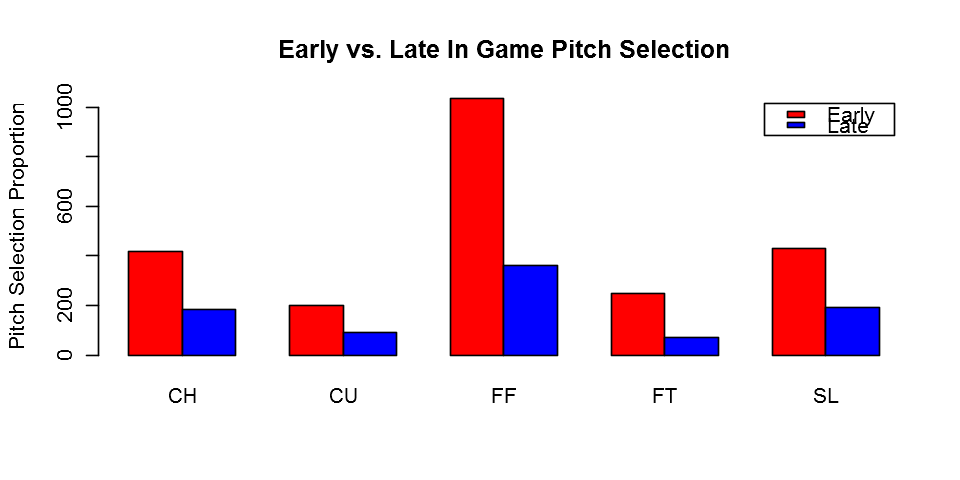

In [100]:
# Create t_type_late
t_type_late <- t(type_late)

# Print dimensions of t_type_late
dim(t_type_late)

# Print dimensions of type_late
dim(type_late)

# Change row names
rownames(t_type_late) <- c("Early", "Late")

# Make barplot using t_type_late
barplot(t_type_late, beside = TRUE, col = c("red", "blue"), 
        main = "Early vs. Late In Game Pitch Selection", 
        ylab = "Pitch Selection Proportion", 
        legend = rownames(t_type_late))

# <font color=blue>Chapter 3:  Exploring pitch locations</font>

#### Locational changes - summary

In [101]:
# Calculate average pitch height in inches in July vs. other months
tapply(greinke$pz, greinke$july, mean) * 12

# Create greinke_lhb
greinke_lhb <- subset(greinke, batter_stand == "L")

# Create greinke_rhb
greinke_rhb <- subset(greinke, batter_stand == "R")

# Compute average px location for LHB
tapply(greinke_lhb$px, greinke_lhb$july, mean) * 12

# Compute average px location for RHB
tapply(greinke_rhb$px, greinke_rhb$july, mean) * 12


july    other 
26.26002 26.39904

july     other 
-4.627355 -6.320144

july    other 
4.032226 5.731850

#### Locational changes - visualization

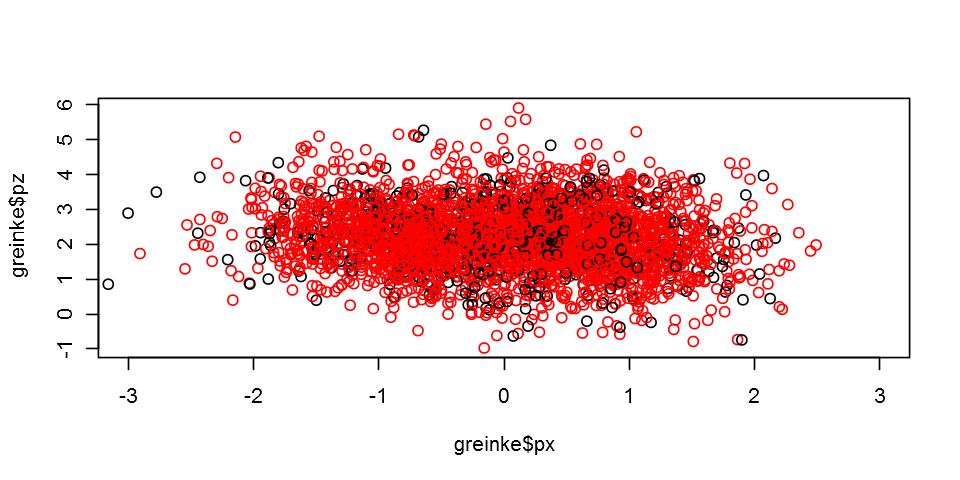

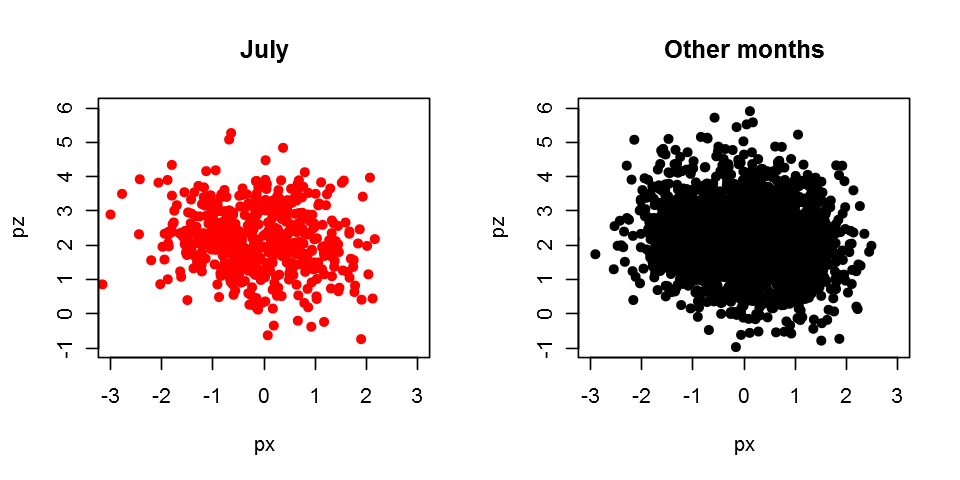

In [102]:
# Plot location of all pitches
plot(greinke$pz ~ greinke$px,
     col = factor(greinke$july),
     xlim = c(-3, 3))

# Formatting code, don't change this
par(mfrow = c(1, 2))

# Plot the pitch loctions for July
plot(pz ~ px, data = greinke_july,
     col = "red", pch = 16,
     xlim = c(-3, 3), ylim = c(-1, 6),
     main = "July")

# Plot the pitch locations for other months
plot(pz ~ px, data = greinke_other,
     col = "black", pch = 16,
     xlim = c(-3, 3), ylim = c(-1, 6),
     main = "Other months")

#### Locational changes - plotting a grid

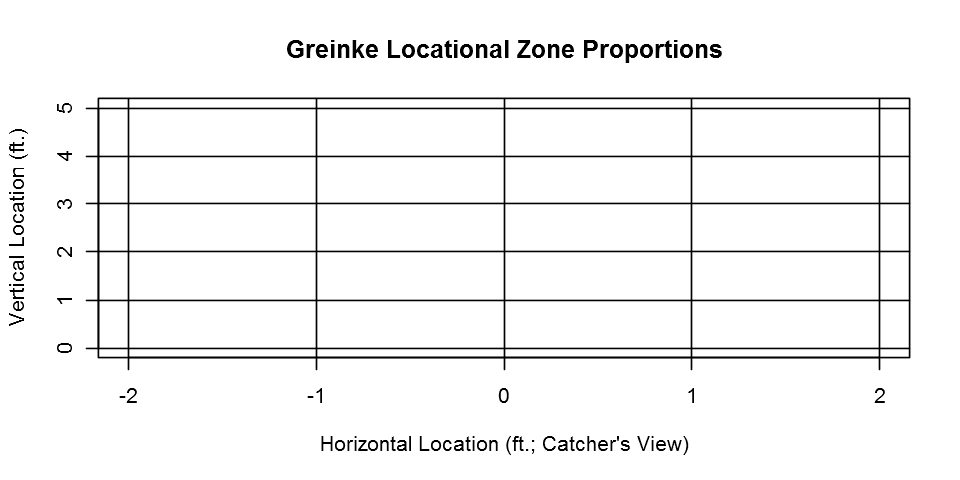

In [109]:
# Create greinke_sub
greinke_sub <- subset(greinke, greinke$px > -2 & greinke$px < 2 & greinke$pz > 0 & greinke$pz < 5)

# Plot pitch location window
plot(x = c(-2, 2), y = c(0, 5), type = "n",
     main = "Greinke Locational Zone Proportions",
     xlab = "Horizontal Location (ft.; Catcher's View)",
     ylab = "Vertical Location (ft.)")

# Add the grid lines
grid(lty = "solid", col = "black")

#### Binning locational data: die Codes laufen nicht, weil die Definition von "zone"fehlt

ACHTUNG: ZONE habe ich per Sampling generiert

Note that a new variable called zone has been added to the greinke data frame. There are 20 possibilities for the zone variable, numbered 1 through 20. Each classification tells us about the location of the given pitch, binned as a grid across the strike zone and just outside the strike zone. There is also a zone_px and zone_pz variable that identify the middle of each of these locational bins. Conveniently, these directly relate to the grid drawn on your figure in the last exercise.

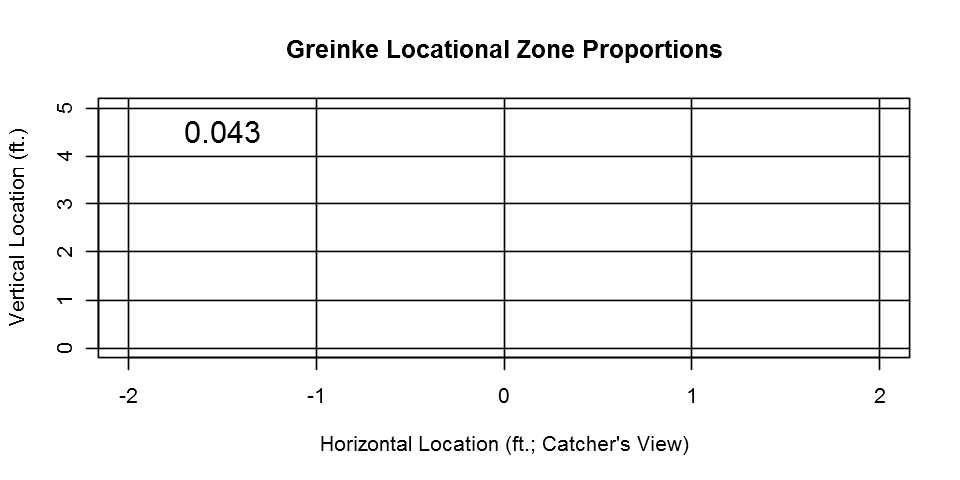

In [177]:
greinke_sub$zone <- sample(1:20, nrow(greinke_sub), replace = TRUE)

# Create greinke_table
greinke_table <- table(greinke_sub$zone)

# Create zone_prop
zone_prop <- round(prop.table(greinke_table), digits = 3)

# Plot strike zone grid, don't change this
plot_grid <- function() {
  plot(x = c(-2,2), y = c(0,5), type = "n",
                  main = "Greinke Locational Zone Proportions",
                  xlab = "Horizontal Location (ft.; Catcher's View)",
                  ylab = "Vertical Location (ft.)")
  grid(lty = "solid", col = "black")
}
plot_grid()

# Add text from zone_prop[1]
text(zone_prop[1], x = -1.5, y = 4.5, cex = 1.5)

#### For loops and plotting locational grid proportions

läuft nicht, weil zone_px und zone_pz nicht definiert sind

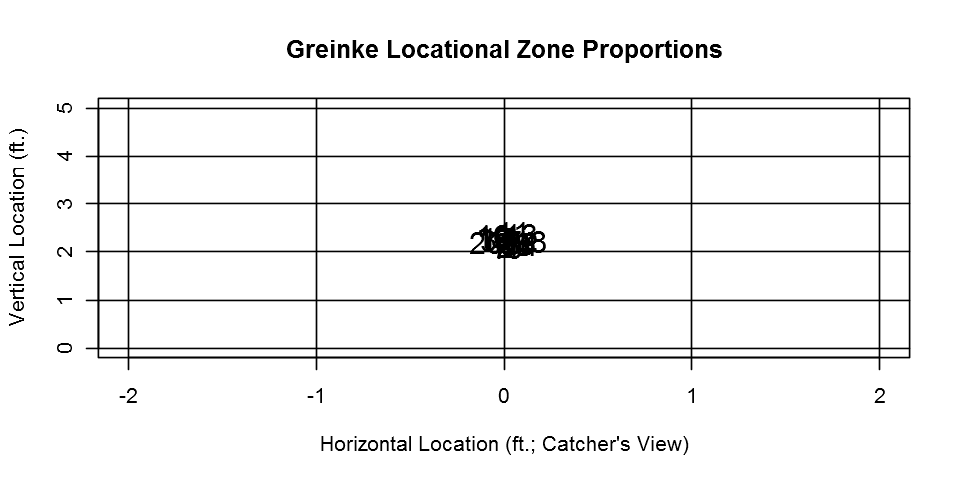

In [178]:
# Plot grid, don't change this
plot_grid()

# Plot text using for loop
for(i in 1:20) {
  text(mean(greinke_sub$zone_px[greinke_sub$zone== i]),
       mean(greinke_sub$zone_pz[greinke_sub$zone== i]),
       mean(greinke_sub$zone[greinke_sub$zone == i]), cex = 1.5)
}

#### Binned locational differences

In [179]:
# Create zone_prop_july
zone_prop_july <- round(
  table(greinke_sub$zone[greinke_sub$july == "july"]) /
    nrow(subset(greinke_sub, july == "july")), 3)

# Create zone_prop_other
zone_prop_other <- round(
  table(greinke_sub$zone[greinke_sub$july == "other"]) /
    nrow(subset(greinke_sub, july == "other")), 3)

# Print zone_prop_july
zone_prop_july

# Print zone_prop_other
zone_prop_other

# Fix zone_prop_july vector, don't change this
zone_prop_july2 <- c(zone_prop_july[1:3], 0.00, zone_prop_july[4:19])
names(zone_prop_july2) <- c(1:20)

# Create zone_prop_diff
zone_prop_diff <- zone_prop_july2 - zone_prop_other

# Print zone_prop_diff
zone_prop_diff


    1     2     3     4     5     6     7     8     9    10    11    12    13 
0.040 0.064 0.056 0.056 0.038 0.048 0.044 0.052 0.052 0.024 0.052 0.058 0.036 
   14    15    16    17    18    19    20 
0.058 0.052 0.056 0.060 0.048 0.054 0.054 


    1     2     3     4     5     6     7     8     9    10    11    12    13 
0.043 0.051 0.046 0.051 0.053 0.052 0.047 0.062 0.045 0.052 0.045 0.058 0.047 
   14    15    16    17    18    19    20 
0.046 0.055 0.053 0.051 0.049 0.053 0.042 


     1      2      3      4      5      6      7      8      9     10     11 
-0.003  0.013  0.010 -0.051  0.003 -0.014  0.001 -0.018  0.007  0.000 -0.021 
    12     13     14     15     16     17     18     19     20 
-0.006  0.011 -0.010  0.003 -0.001  0.005  0.011 -0.005  0.012 

#### Plotting zone proportion differences

In [ ]:
# Plot grid, don't change this
plot_grid()

# Create for loop
for(i in 1:20) {
  text(mean(greinke_sub$zone_px[greinke_sub$zone == i]),
       mean(greinke_sub$zone_pz[greinke_sub$zone == i]),
       zone_prop_diff[i, ], cex = 1.5)
}

#### Location and ball-strike count

In [ ]:
# Create greinke_zone_tab
greinke_zone_tab <-table(greinke_sub$zone, greinke_sub$bs_count)

# Create zone_count_prop
zone_count_prop <- round(prop.table(greinke_zone_tab, margin = 2), digits = 3)
# Print zone_count_prop
zone_count_prop

#### 0-2 vs. 3-0 locational changes

In [ ]:
# Create zone_count_diff
zone_count_diff <- zone_count_prop[,3] - zone_count_prop[,10]

# Print the table
zone_count_diff

#### Plotting count-based locational differences

In [ ]:
# Plot grid, don't change this
plot(x = c(-2, 2), y = c(0, 5), type = "n",
     main = "Greinke Locational Zone (0-2 vs. 3-0 Counts)",
     xlab = "Horizontal Location (ft.; Catcher's View)",
     ylab = "Vertical Location (ft.)")
grid(lty = "solid", col = "black")

# Add text to the figure for location differences
for(i in 1:20) {
  text(mean(greinke_sub$zone_px[greinke_sub$zone == i]),
       mean(greinke_sub$zone_pz[greinke_sub$zone == i]),
       zone_count_diff[i, ], cex = 1.5)
}

# <font color=blue>Chapter 4:  Exploring batted ball outcomes </font>

#### Velocity impact on contact rate

In [104]:
# Create batter_swing
no_swing <- c("Ball", "Called Strike", "Ball in Dirt", "Hit By Pitch")
greinke_ff$batter_swing <- ifelse(greinke_ff$pitch_result %in% no_swing, 0, 1)

# Create swing_ff
swing_ff <- subset(greinke_ff, greinke_ff$batter_swing == 1)

# Create the contact variable
no_contact <- c("Swinging Strike", "Missed Bunt")
swing_ff$contact <- ifelse(swing_ff$pitch_result %in% no_contact, 0, 1)

# Create velo_bin: add one line for "Fast"
swing_ff$velo_bin <- ifelse(swing_ff$start_speed < 90.5, "Slow", NA)

swing_ff$velo_bin <- ifelse(swing_ff$start_speed >= 90.5 & swing_ff$start_speed < 92.5, 
  "Medium", swing_ff$velo_bin)

swing_ff$velo_bin <- ifelse(swing_ff$start_speed >= 92.5, 
  "Fast", swing_ff$velo_bin)

# Aggregate contact rate by velocity bin
tapply(swing_ff$contact, swing_ff$velo_bin, mean)

Fast    Medium      Slow 
0.7938596 0.8328076 0.8433735

#### Pitch type impact on contact rate

The swings dataset, which includes only pitches at which a batter has swung, has been created for you. Also note that we have written a new function called bin_pitch_speed() for use in calculating quantiles.

In [117]:
no_swing <- c("Ball", "Called Strike", "Ball in Dirt", "Hit By Pitch")
greinke_sub$batter_swing <- ifelse(greinke_sub$pitch_result %in% no_swing, 0, 1)

# Create swings
swings <- subset(greinke_sub, greinke_sub$batter_swing == 1)

bin_pitch_speed <- function(start_speed) {
  as.integer(cut(start_speed, quantile(start_speed, probs = 0:3 / 3), include.lowest = TRUE))
}

# Create the subsets for each pitch type
swing_ff <- subset(swings, pitch_type == "FF")
swing_ch <- subset(swings, pitch_type == "CH")
swing_cu <- subset(swings, pitch_type == "CU")
swing_ft <- subset(swings, pitch_type == "FT")
swing_sl <- subset(swings, pitch_type == "SL")

# Make velo_bin_pitch variable for each subset
swing_ff$velo_bin <- bin_pitch_speed(swing_ff$start_speed)
swing_ch$velo_bin <- bin_pitch_speed(swing_ch$start_speed)
swing_cu$velo_bin <- bin_pitch_speed(swing_cu$start_speed)
swing_ft$velo_bin <- bin_pitch_speed(swing_ft$start_speed)
swing_sl$velo_bin <- bin_pitch_speed(swing_sl$start_speed)

# Print quantile levels for each pitch
thirds <- c(0, 1/3, 2/3, 1)
quantile(swing_ff$start_speed, probs = thirds)
quantile(swing_ch$start_speed, probs = thirds)
quantile(swing_cu$start_speed, probs = thirds)
quantile(swing_ft$start_speed, probs = thirds)
quantile(swing_sl$start_speed, probs = thirds)

0% 33.33333% 66.66667%      100% 
     88.2      91.3      92.5      94.9

0% 33.33333% 66.66667%      100% 
 80.40000  87.80000  88.96667  91.50000

0% 33.33333% 66.66667%      100% 
     63.7      73.3      75.3      79.4

0% 33.33333% 66.66667%      100% 
 87.90000  90.50000  91.86667  95.40000

0% 33.33333% 66.66667%      100% 
     79.8      86.5      87.6      91.4

#### Velocity impact on contact by pitch type

In [120]:
no_contact <- c("Swinging Strike", "Missed Bunt")
swing_ff$contact <- ifelse(swing_ff$pitch_result %in% no_contact, 0, 1)
swing_ft$contact <- ifelse(swing_ft$pitch_result %in% no_contact, 0, 1)
swing_ch$contact <- ifelse(swing_ch$pitch_result %in% no_contact, 0, 1)
swing_cu$contact <- ifelse(swing_cu$pitch_result %in% no_contact, 0, 1)
swing_sl$contact <- ifelse(swing_sl$pitch_result %in% no_contact, 0, 1)

# Calculate contact rate by velocity for swing_ff
tapply(swing_ff$contact, swing_ff$velo_bin, mean)

# Calculate contact rate by velocity for swing_ft
tapply(swing_ft$contact, swing_ft$velo_bin, mean)

# Calculate contact rate by velocity for swing_ch
tapply(swing_ch$contact, swing_ch$velo_bin, mean)

# Calculate contact rate by velocity for swing_cu
tapply(swing_cu$contact, swing_cu$velo_bin, mean)

# Calculate contact rate by velocity for swing_sl
tapply(swing_sl$contact, swing_sl$velo_bin, mean)

1         2         3 
0.8364486 0.8413462 0.7815534

1         2         3 
0.8103448 0.8571429 0.8703704

1         2         3 
0.7603306 0.6759259 0.7652174

1         2         3 
0.8709677 0.8333333 0.8888889

1         2         3 
0.7142857 0.7230769 0.6803279

#### Greinke's out pitch?

In [123]:
no_contact <- c("Swinging Strike", "Missed Bunt")
swings$contact <- ifelse(swings$pitch_result %in% no_contact, 0, 1)

# Create swings_str2
swings_str2 <- subset(swings, swings$strikes == 2)

# Print number of observations
nrow(swings_str2)

# Print a table of pitch use
table(swings_str2$pitch_type)

# Calculate contact rate by pitch type
round(tapply(swings_str2$contact, swings_str2$pitch_type, mean), digits = 3)

[1] 560


 CH  CU  FF  FT  SL 
115  15 182  50 198 

CH    CU    FF    FT    SL 
0.774 0.867 0.846 0.800 0.798

#### Impact of pitch location on contact rate

Code läuft nicht, weil die Definition von zone und zone_px und zone_pz fehlt. Der erwartete Output ist als Bild eingefügt.

In [ ]:
# Create subset of swings: swings_rhb
swings_rhb <- subset(swings, swings$batter_stand == "R")

# Create subset of swings: swings_lhb
swings_lhb <- subset(swings, swings$batter_stand == "L")

# Create zone_contact_r
zone_contact_r <- round(tapply(swings_rhb$contact, swings_rhb$zone, mean), digits = 3)

# Create zone_contact_l
zone_contact_l <- round(tapply(swings_lhb$contact, swings_lhb$zone, mean), digits = 3)

# Plot figure grid for RHB
par(mfrow = c(1, 2))
plot(x = c(-1, 1), y = c(1, 4), type = "n", 
     main = "Contact Rate by Location (RHB)", 
     xlab = "Horizontal Location (ft.; Catcher's View)", 
     ylab = "Vertical Location (ft.)")
abline(v = 0)
abline(h = 2)
abline(h = 3)

# Add text for RHB contact rate
for(i in unique(c(6, 7, 10, 11, 14, 15))) {
  text(mean(swings_rhb$zone_px[swings_rhb$zone == i]), 
       mean(swings_rhb$zone_pz[swings_rhb$zone == i]), 
       zone_contact_r[rownames(zone_contact_r) == i], cex = 1.5)
}

# Add LHB plot
plot(x = c(-1, 1), y = c(1, 4), type = "n", 
     main = "Contact Rate by Location (LHB)", 
     xlab = "Horizontal Location (ft.; Catcher's View)", 
     ylab = "Vertical Location (ft.)")
abline(v = 0)
abline(h = 2)
abline(h = 3)

# Add text for LHB contact rate
for(i in unique(c(6, 7, 10, 11, 14, 15))) {
  text(mean(swings_lhb$zone_px[swings_lhb$zone == i]), 
       mean(swings_lhb$zone_pz[swings_lhb$zone == i]), 
       zone_contact_l[rownames(zone_contact_l) == i], cex = 1.5)
}

<img src="Chapter4_Impact_of_pitch_location_on_contact_rate.JPG">

#### Rethinking the use of for loops

In [136]:
# Create vector px
px <- rep(seq(from = -1.5, to = 1.5, by = 1), times = 5)

# Create vector pz
pz <- rep(seq(from = 4.5, to = 0.5, by = -1), each = 4)

# Create vector of zone numbers
zone <- seq(from = 1, to = 20, 1)

# Create locgrid
locgrid_initial <- data.frame(zone, px, pz)

# Print locgrid_initial
locgrid_initial

zone,px,pz
1,-1.5,4.5
2,-0.5,4.5
3,0.5,4.5
4,1.5,4.5
5,-1.5,3.5
6,-0.5,3.5
7,0.5,3.5
8,1.5,3.5
9,-1.5,2.5
10,-0.5,2.5


#### Contact rate with ggplot2

zone,px,pz,contact_rate_r,contact_rate_l
1,-1.5,4.5,0.500,NA
2,-0.5,4.5,NA,1.000
3,0.5,4.5,0.667,NA
4,1.5,4.5,NA,NA
5,-1.5,3.5,0.833,0.500
6,-0.5,3.5,0.729,0.926
7,0.5,3.5,0.701,0.809
8,1.5,3.5,0.917,1.000
9,-1.5,2.5,1.000,0.767
10,-0.5,2.5,0.880,0.939


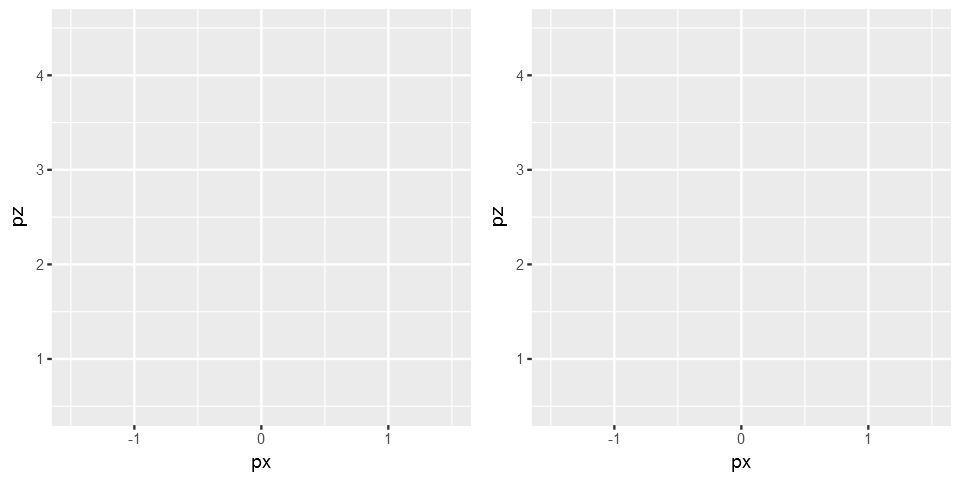

In [140]:
# The gridExtra package is preloaded in your workspace

# Examine new contact data
zone_contact_r <- read.csv("zone_contact_r.csv", header = TRUE, sep = ";")
zone_contact_l <- read.csv("zone_contact_l.csv", header = TRUE, sep = ";")

# Merge locgrid with zone_contact_r
locgrid <- merge(locgrid_initial, zone_contact_r, by = "zone", all.x = TRUE)

# Merge locgrid with zone_contact_l
locgrid <- merge(locgrid, zone_contact_l, by = "zone", all.x = TRUE)

# Print locgrid to the console
locgrid

# Make base grid with ggplot()
plot_base_grid <- ggplot(data = locgrid, aes(x = px, y = pz))

# Arrange the plots side-by-side
grid.arrange(plot_base_grid, plot_base_grid, ncol = 2)

#### Adding titles and axes to ggplot2 figure

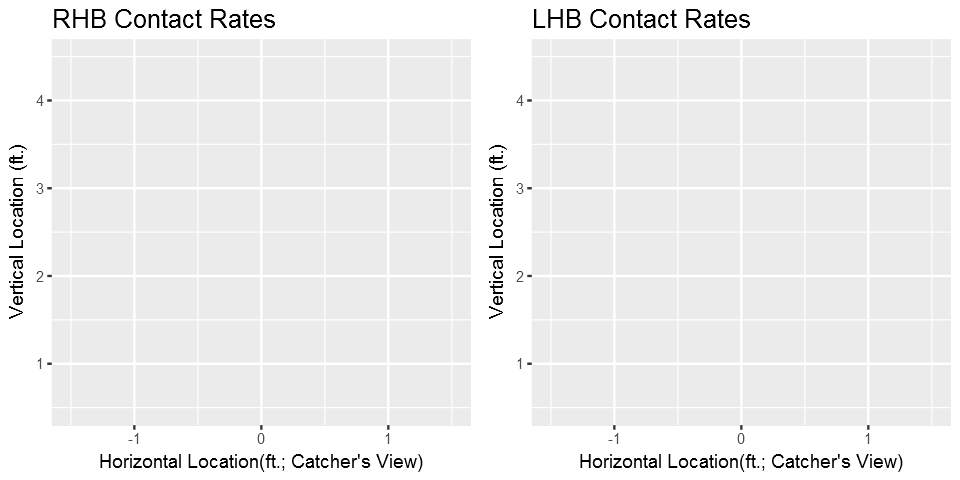

In [141]:
# Make RHB plot
plot_titles_rhb <- plot_base_grid + 
  ggtitle("RHB Contact Rates") + 
  labs(x = "Horizontal Location(ft.; Catcher's View)", 
       y = "Vertical Location (ft.)") + 
  theme(plot.title = element_text(size = 15))

# Make LHB plot
plot_titles_lhb <- plot_base_grid + 
  ggtitle("LHB Contact Rates") + 
  labs(x = "Horizontal Location(ft.; Catcher's View)", 
       y = "Vertical Location (ft.)") + 
  theme(plot.title = element_text(size = 15))


# Display both side-by-side
grid.arrange(plot_titles_rhb, plot_titles_lhb, ncol = 2)

#### Making a heat map - visualizing hot and cold zones

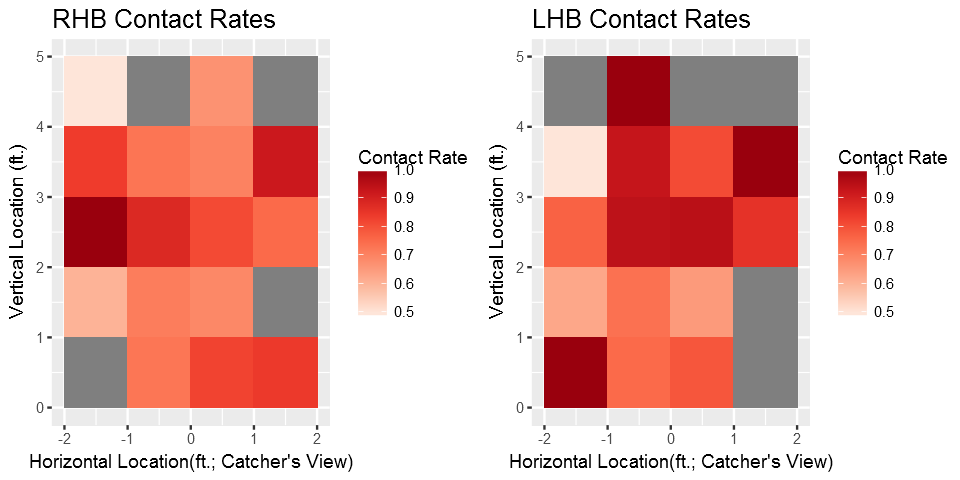

In [150]:
# Make RHB plot
plot_colors_rhb <- plot_titles_rhb + 
  geom_tile(aes(fill = contact_rate_r)) + 
  scale_fill_gradientn(name = "Contact Rate", 
                       limits = c(0.5, 1), 
                       breaks = seq(from = 0.5, to = 1, by = 0.1), 
                       colors = c(brewer.pal(n = 7, name = "Reds")))

# Make LHB plot
plot_colors_lhb <- plot_titles_lhb + 
  geom_tile(aes(fill = contact_rate_l)) + 
  scale_fill_gradientn(name = "Contact Rate", 
                       limits = c(0.5, 1), 
                       breaks = seq(from = 0.5, to = 1, by = 0.1), 
                       colors = c(brewer.pal(n = 7, name = "Reds")))

# Display plots side-by-side
grid.arrange(plot_colors_rhb, plot_colors_lhb, ncol = 2)

#### Adding text for contact rate values

Warning message:
"Removed 3 rows containing missing values (geom_text)."Warning message:
"Removed 4 rows containing missing values (geom_text)."

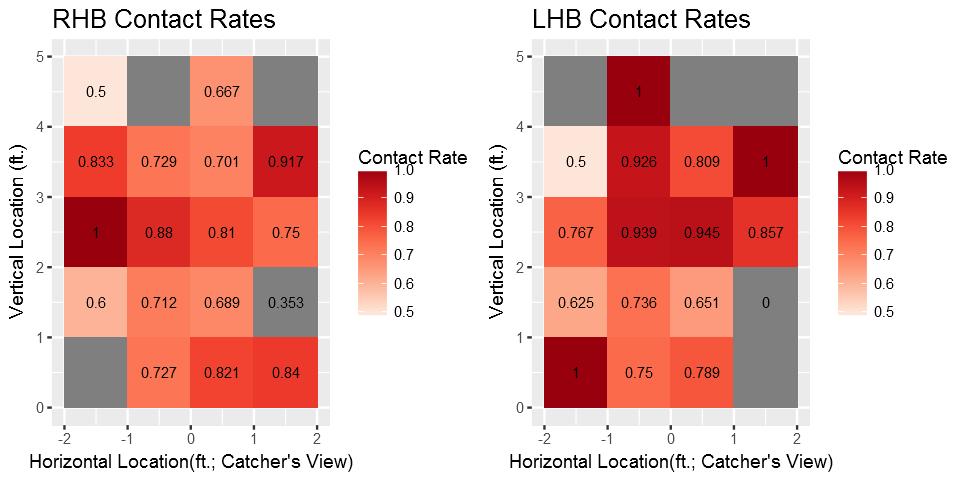

In [158]:
# Make RHB plot
plot_contact_rhb <- plot_colors_rhb + 
  annotate("text", x = locgrid$px, y = locgrid$pz, 
           label = locgrid$contact_rate_r, size = 3)

# Make LHB plot
plot_contact_lhb <- plot_colors_lhb + 
  annotate("text", x = locgrid$px, y = locgrid$pz, 
           label = locgrid$contact_rate_l, size = 3)

# Plot them side-by-side
grid.arrange(plot_contact_rhb, plot_contact_lhb, ncol = 2)

#### Contact and exit speed

Damit der Code läuft wurde Variable "zone" per Zufall generiert

In [163]:
swings$zone <- sample(1:20, nrow(swings), replace = TRUE)


# Create pcontact
pcontact <- subset(swings, swings$contact == 1 & !is.na(swings$batted_ball_velocity))

# Create pcontact_r
pcontact_r <- subset(pcontact, pcontact$batter_stand == "R")

# Create pcontact_l
pcontact_l <- subset(pcontact, pcontact$batter_stand == "L")

#### Location and exit speed

In [164]:
# Create exit_speed_r
exit_speed_r <- data.frame(tapply(pcontact_r$batted_ball_velocity, 
                                  pcontact_r$zone, mean))
exit_speed_r <- round(exit_speed_r, 1)
colnames(exit_speed_r) <- "exit_speed_rhb"
exit_speed_r$zone <- row.names(exit_speed_r)

# Create exit_speed_l
exit_speed_l <- data.frame(tapply(pcontact_l$batted_ball_velocity, 
                                  pcontact_l$zone, mean))
exit_speed_l <- round(exit_speed_l, 1)
colnames(exit_speed_l) <- "exit_speed_lhb"
exit_speed_l$zone <- row.names(exit_speed_l)
  
# Merge with locgrid
locgrid <- merge(locgrid, exit_speed_r, by = "zone", all.x = T)
locgrid <- merge(locgrid, exit_speed_l, by = "zone", all.x = T)

# Print locgrid
locgrid

zone,px,pz,contact_rate_r,contact_rate_l,exit_speed_rhb,exit_speed_lhb
1,-1.5,4.5,0.500,NA,83.8,84.9
2,-0.5,4.5,NA,1.000,91.3,86.2
3,0.5,4.5,0.667,NA,86.1,81.2
4,1.5,4.5,NA,NA,96.6,91.2
5,-1.5,3.5,0.833,0.500,90.1,87.0
6,-0.5,3.5,0.729,0.926,87.6,83.0
7,0.5,3.5,0.701,0.809,82.2,91.8
8,1.5,3.5,0.917,1.000,89.8,89.1
9,-1.5,2.5,1.000,0.767,86.3,84.5
10,-0.5,2.5,0.880,0.939,93.4,92.6


#### Plotting exit speed as a heat map

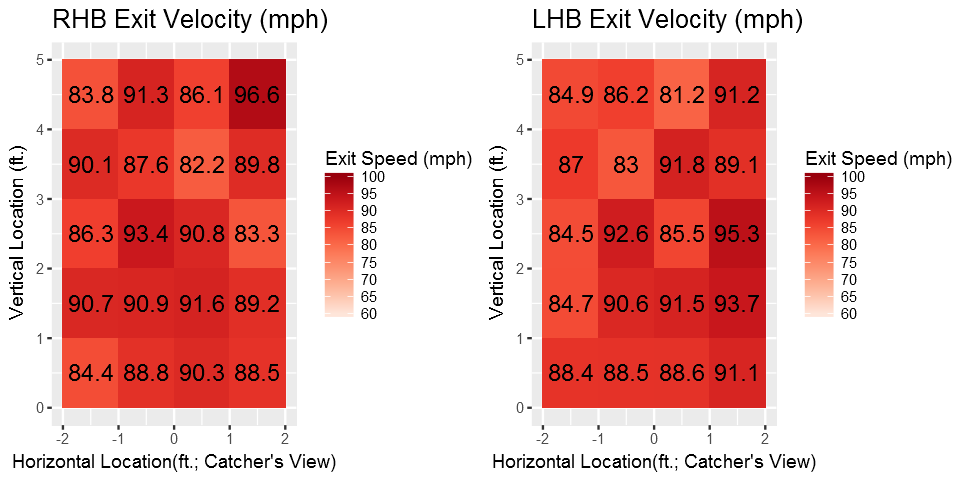

In [168]:
# Create RHB exit speed plotting object
plot_exit_rhb <- plot_base_grid + 
  geom_tile(data = locgrid, aes(fill = exit_speed_rhb)) + 
  scale_fill_gradientn(name = "Exit Speed (mph)", 
                       limits = c(60, 100), 
                       breaks = seq(from = 60, to = 100, by = 5), 
                       colors = c(brewer.pal(n = 7, name = "Reds"))) + 
  annotate("text", x = locgrid$px, y = locgrid$pz, 
           label = locgrid$exit_speed_rhb, size = 5) + 
  ggtitle("RHB Exit Velocity (mph)") + 
  labs(x = "Horizontal Location(ft.; Catcher's View)", 
       y = "Vertical Location (ft.)") + 
  theme(plot.title = element_text(size = 15))

# Create LHB exit speed plotting object
plot_exit_lhb <- plot_base_grid + 
  geom_tile(data = locgrid, aes(fill = exit_speed_lhb)) + 
  scale_fill_gradientn(name = "Exit Speed (mph)", 
                       limits = c(60, 100), 
                       breaks = seq(from = 60, to = 100, by = 5), 
                       colors = c(brewer.pal(n = 7, name = "Reds"))) + 
  annotate("text", x = locgrid$px, y = locgrid$pz, 
           label = locgrid$exit_speed_lhb, size = 5) + 
  ggtitle("LHB Exit Velocity (mph)") + 
  labs(x = "Horizontal Location(ft.; Catcher's View)", 
       y = "Vertical Location (ft.)") + 
  theme(plot.title = element_text(size = 15))


# Plot each side-by-side
grid.arrange(plot_exit_rhb, plot_exit_lhb, ncol = 2)

#### Using tidy data and facets in ggplot2

zone,px,pz,batter_stand,exit_speed
1,-1.5,4.5,RHB,NA
2,-0.5,4.5,RHB,NA
3,0.5,4.5,RHB,92.0
4,1.5,4.5,RHB,NA
5,-1.5,3.5,RHB,60.5
6,-0.5,3.5,RHB,88.0


,zone,px,pz,batter_stand,exit_speed
35,15,0.5,1.5,LHB,92.8
36,16,1.5,1.5,LHB,NA
37,17,-1.5,0.5,LHB,83.5
38,18,-0.5,0.5,LHB,92.0
39,19,0.5,0.5,LHB,84.6
40,20,1.5,0.5,LHB,NA


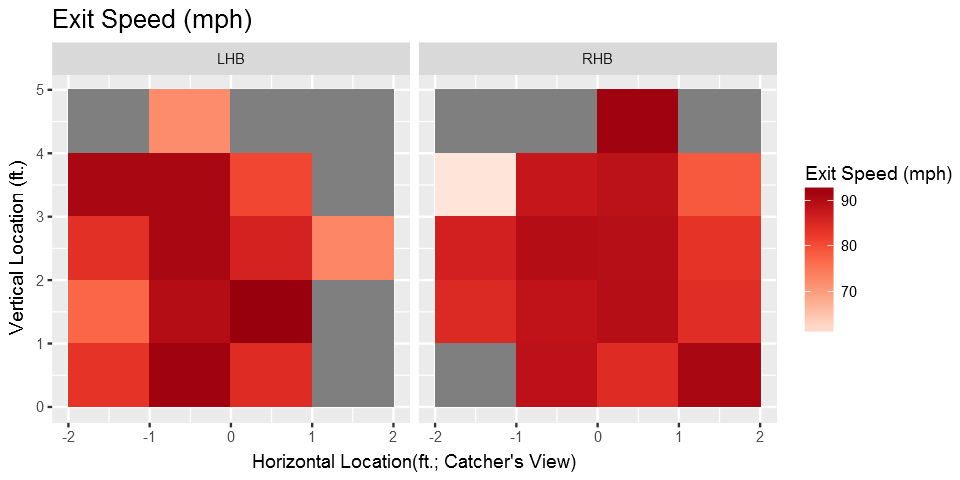

In [173]:
exit_tidy <- read.csv("exit_tidy.csv", header = TRUE, sep = ";")

# Examine head() and tail() of exit_tidy
head(exit_tidy)
tail(exit_tidy)

# Create plot_exit
plot_exit <- plot_base_grid + 
  geom_tile(data = exit_tidy, aes(fill = exit_speed)) + 
  scale_fill_gradientn(name = "Exit Speed (mph)", 
                       colors = c(brewer.pal(n = 7, name = "Reds"))) + 
  ggtitle("Exit Speed (mph)") + 
  labs(x = "Horizontal Location(ft.; Catcher's View)", 
       y = "Vertical Location (ft.)") + 
  theme(plot.title = element_text(size = 15)) +
  facet_grid(. ~ batter_stand)

# Display plot_exit
plot_exit